In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# extra uniqueness
import plotly.express as px
from sklearn.preprocessing import PowerTransformer

In [ ]:
df = pd.read_csv('PCOS_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient File No.       541 non-null    int64  
 1   PCOS (Y/N)             541 non-null    int64  
 2    Age (yrs)             541 non-null    int64  
 3   Weight (Kg)            541 non-null    float64
 4   Height(Cm)             541 non-null    float64
 5   BMI                    541 non-null    float64
 6   Blood Group            541 non-null    int64  
 7   Pulse rate(bpm)        541 non-null    int64  
 8   RR (breaths/min)       541 non-null    int64  
 9   Hb(g/dl)               541 non-null    float64
 10  Cycle(R/I)             541 non-null    int64  
 11  Cycle length(days)     541 non-null    int64  
 12  Marraige Status (Yrs)  540 non-null    float64
 13  Pregnant(Y/N)          541 non-null    int64  
 14  No. of aborptions      541 non-null    int64  
 15  FSH(mI

In [ ]:
df.drop(columns= ["Unnamed: 40",'Patient File No.'],inplace=True )

In [ ]:
df.columns.tolist()

['PCOS (Y/N)',
 ' Age (yrs)',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'RR (breaths/min)',
 'Hb(g/dl)',
 'Cycle(R/I)',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Pregnant(Y/N)',
 'No. of aborptions',
 'FSH(mIU/mL)',
 'LH(mIU/mL)',
 'FSH/LH',
 'Hip(inch)',
 'Waist(inch)',
 'Waist(inch).1',
 'TSH (mIU/L)',
 'PRL(ng/mL)',
 'Vit D3 (ng/mL)',
 'PRG(ng/mL)',
 'RBS(mg/dl)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'Skin darkening (Y/N)',
 'Hair loss(Y/N)',
 'Pimples(Y/N)',
 'Fast food (Y/N)',
 'Reg.Exercise(Y/N)',
 'BP _Systolic (mmHg)',
 'BP _Diastolic (mmHg)',
 'Follicle No. (L)',
 'Follicle No. (R)',
 'Avg. F size (L) (mm)',
 'Avg. F size (R) (mm)',
 'Endometrium (mm)']

# Handling Null Values

In [ ]:
print(df.isnull().sum()[df.isnull().sum() > 0   ])

Marraige Status (Yrs)    1
Fast food (Y/N)          1
dtype: int64


In [ ]:
df.fillna(df.mean(), inplace= True)

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0]

,0


### Mapping Features according to description

In [ ]:
df['Cycle(R/I)'].value_counts()

,count
Cycle(R/I),
2,390
4,150
5,1


In [ ]:
df['Cycle(R/I)'] = df['Cycle(R/I)'].map({2: 0, 5: 0, 4: 1})

In [ ]:
df['Blood Group'].value_counts()

,count
Blood Group,
15,206
13,135
11,108
17,42
16,19
14,16
12,13
18,2


In [ ]:
# Define numeric mapping
blood_group_map_num = {
    11: 0,
    12: 1,
    13: 2,
    14: 3,
    15: 4,
    16: 5,
    17: 6,
    18: 7
}

# Apply mapping
df['Blood Group'] = df['Blood Group'].replace(blood_group_map_num).astype(int)


In [ ]:
df.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.300000,4,78,22,10.48,0,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,4,74,20,11.70,0,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,0,72,18,11.80,0,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,2,72,20,12.00,0,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,0,72,18,10.00,0,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


# Checking Skewness

In [ ]:
import plotly.express as px

skewness = df.skew(numeric_only=True).reset_index()
skewness.columns = ['Column', 'Skewness']

# Filter skewed features
skewness_filtered = skewness[(skewness['Skewness'] > 1) | (skewness['Skewness'] < -1)]

# Bar plot
fig = px.bar(
    skewness_filtered,
    x='Column',
    y='Skewness',
    title="Highly Skewed Features (Skewness > 1 or Skewness < -1)",
    color='Skewness',
    color_continuous_scale="Viridis",
    text='Skewness'
)

# Add text labels outside bars
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.show()


In [ ]:
skewness = df.skew(numeric_only=True).reset_index()
skewness.columns = ['Column', 'Skewness']

positive_skew = skewness[skewness['Skewness'] > 1]
negative_skew = skewness[skewness['Skewness'] < -1]

print(" Positively Skewed Columns:")
print(positive_skew)

print("\n Negatively Skewed Columns:")
print(negative_skew)

 Positively Skewed Columns:
                   Column   Skewness
7        RR (breaths/min)   1.234130
11  Marraige Status (Yrs)   1.143231
13      No. of aborptions   2.970831
14            FSH(mIU/mL)  23.244530
15             LH(mIU/mL)  23.234664
16                 FSH/LH  21.463644
20            TSH (mIU/L)   9.790706
21             PRL(ng/mL)   2.441412
22         Vit D3 (ng/mL)  16.436558
23             PRG(ng/mL)  20.730654
24             RBS(mg/dl)   5.488676
26       hair growth(Y/N)   1.018699
31      Reg.Exercise(Y/N)   1.172249

 Negatively Skewed Columns:
                  Column  Skewness
6       Pulse rate(bpm)  -7.948497
32   BP _Systolic (mmHg) -4.845716
33  BP _Diastolic (mmHg) -3.884299
36  Avg. F size (L) (mm) -1.147341


# Treating SKewness

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer


binary_cols = [
    "PCOS(Y/N)", "Pregnant(Y/N)", "Weight gain (Y/N)", "Hair growth(Y/N)",
    "Skin darkening(Y/N)", "Hair Loss(Y/N)", "Pimples(Y/N)",
    "Fast food (Y/N)", "Reg excercise(Y/N)"
]

categorical_cols = ["Blood group", "Cycle(R/I)"]

numeric_cols = [col for col in df.columns if col not in binary_cols + categorical_cols]
before_skewness = df[numeric_cols].skew().sort_values()

pos_skewed = before_skewness[before_skewness > 0.5].index.tolist()
neg_skewed = before_skewness[before_skewness < -0.5].index.tolist()

print("📈 Positively Skewed BEFORE:\n", before_skewness[before_skewness > 0.5])
print("\n📉 Negatively Skewed BEFORE:\n", before_skewness[before_skewness < -0.5])

# Yeo-Johnson for positive skew
pt = PowerTransformer(method='yeo-johnson')
df[pos_skewed] = pt.fit_transform(df[pos_skewed])

# Cube transformation for negative skew
df[neg_skewed] = np.power(df[neg_skewed], 3)
after_skewness = df[numeric_cols].skew().sort_values()

skew_df = pd.DataFrame({
    "Before_Skewness": before_skewness,
    "After_Skewness": after_skewness
}).sort_values("Before_Skewness")

print("\n📊 Full Skewness Comparison Table:\n")
print(skew_df)

📈 Positively Skewed BEFORE:
 Weight gain(Y/N)          0.508661
Weight (Kg)               0.515227
PCOS (Y/N)                0.738773
Hb(g/dl)                  0.744115
Follicle No. (R)          0.785224
Cycle length(days)        0.826791
Skin darkening (Y/N)      0.840008
Follicle No. (L)          0.944619
hair growth(Y/N)          1.018699
Marraige Status (Yrs)     1.143231
Reg.Exercise(Y/N)         1.172249
RR (breaths/min)          1.234130
PRL(ng/mL)                2.441412
No. of aborptions         2.970831
RBS(mg/dl)                5.488676
TSH (mIU/L)               9.790706
Vit D3 (ng/mL)           16.436558
PRG(ng/mL)               20.730654
FSH/LH                   21.463644
LH(mIU/mL)               23.234664
FSH(mIU/mL)              23.244530
dtype: float64

📉 Negatively Skewed BEFORE:
 Pulse rate(bpm)        -7.948497
BP _Systolic (mmHg)    -4.845716
BP _Diastolic (mmHg)   -3.884299
Avg. F size (L) (mm)   -1.147341
Avg. F size (R) (mm)   -0.808139
dtype: float64

📊 Full Ske

In [ ]:
skewness = df.skew(numeric_only=True).reset_index()
skewness.columns = ['Column', 'Skewness']
skewness_filtered = skewness[(skewness['Skewness'] > 0) | (skewness['Skewness'] < 0)]
fig = px.bar(
    skewness_filtered,
    x='Column',
    y='Skewness',
    title="Highly Skewed Features (Skewness > 1 or Skewness < -1)",
    color='Skewness',
    color_continuous_scale="Viridis",
    text='Skewness'
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

In [ ]:
print(df[numeric_cols].var())

PCOS (Y/N)               1.001852e+00
 Age (yrs)               2.927898e+01
Weight (Kg)              1.001852e+00
Height(Cm)               3.640366e+01
BMI                      1.645437e+01
Blood Group              3.388588e+00
Pulse rate(bpm)          2.646666e+09
RR (breaths/min)         1.001852e+00
Hb(g/dl)                 1.001852e+00
Cycle length(days)       1.001852e+00
Marraige Status (Yrs)    1.001852e+00
No. of aborptions        1.001852e+00
FSH(mIU/mL)              1.001852e+00
LH(mIU/mL)               1.001852e+00
FSH/LH                   1.001852e+00
Hip(inch)                1.574439e+01
Waist(inch)              1.293765e+01
Waist(inch).1            1.293765e+01
TSH (mIU/L)              1.001852e+00
PRL(ng/mL)               1.001852e+00
Vit D3 (ng/mL)           1.001852e+00
PRG(ng/mL)               1.001852e+00
RBS(mg/dl)               1.001852e+00
Weight gain(Y/N)         1.001852e+00
hair growth(Y/N)         1.001852e+00
Skin darkening (Y/N)     1.001852e+00
Hair loss(Y/

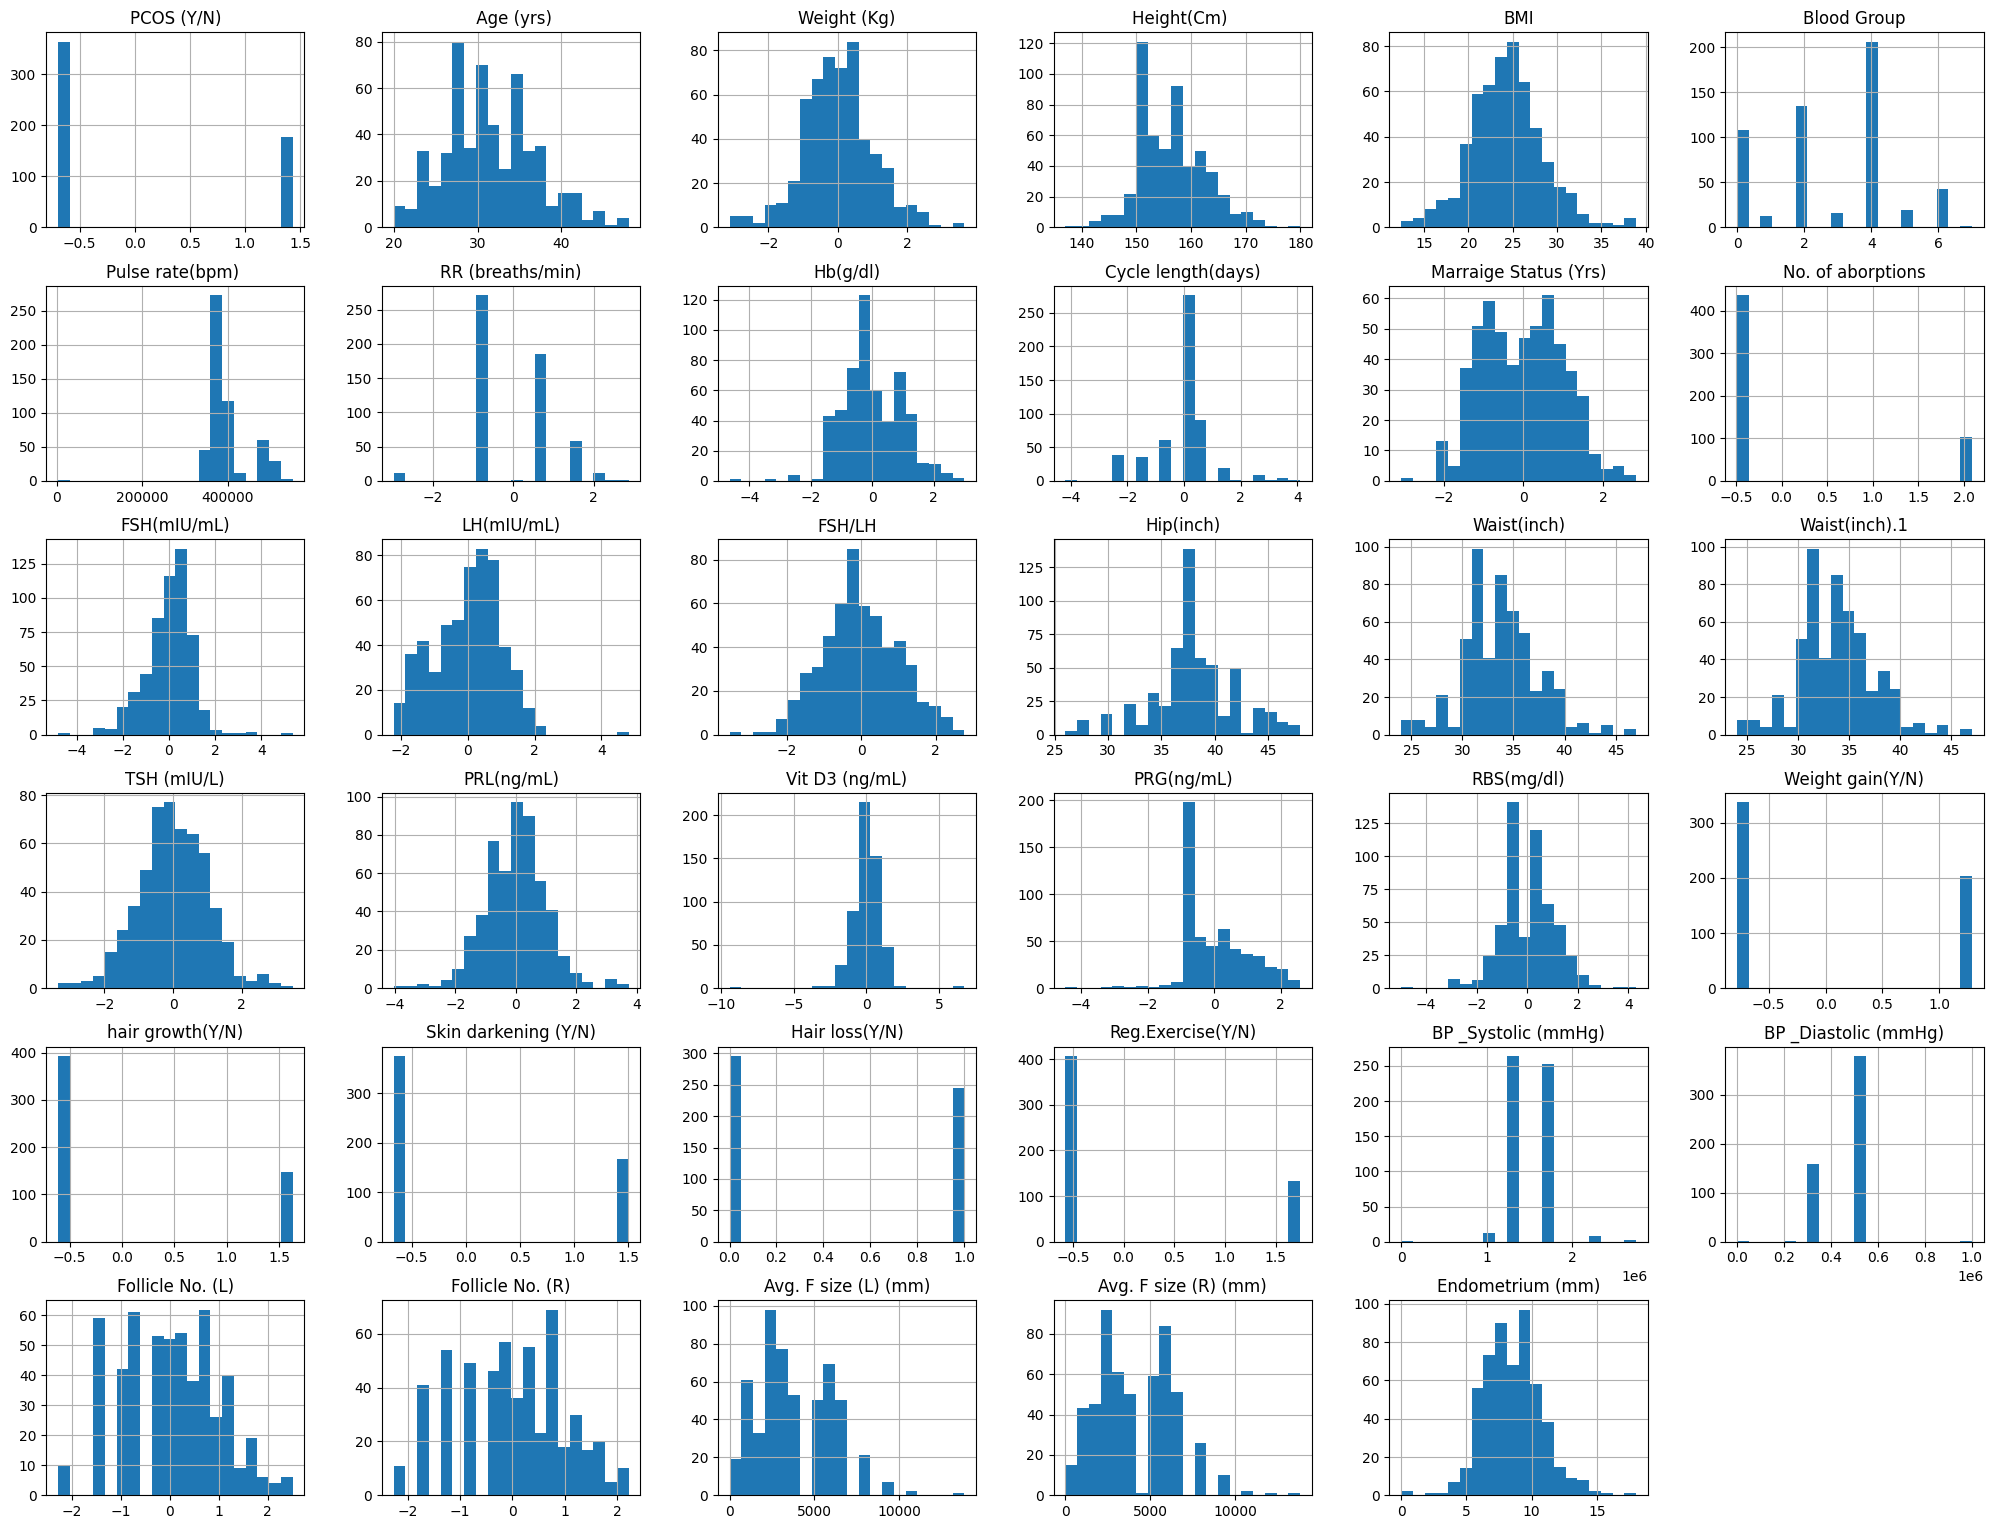

In [ ]:
import matplotlib.pyplot as plt

df[numeric_cols].hist(bins=20, figsize=(25,19))
plt.show()

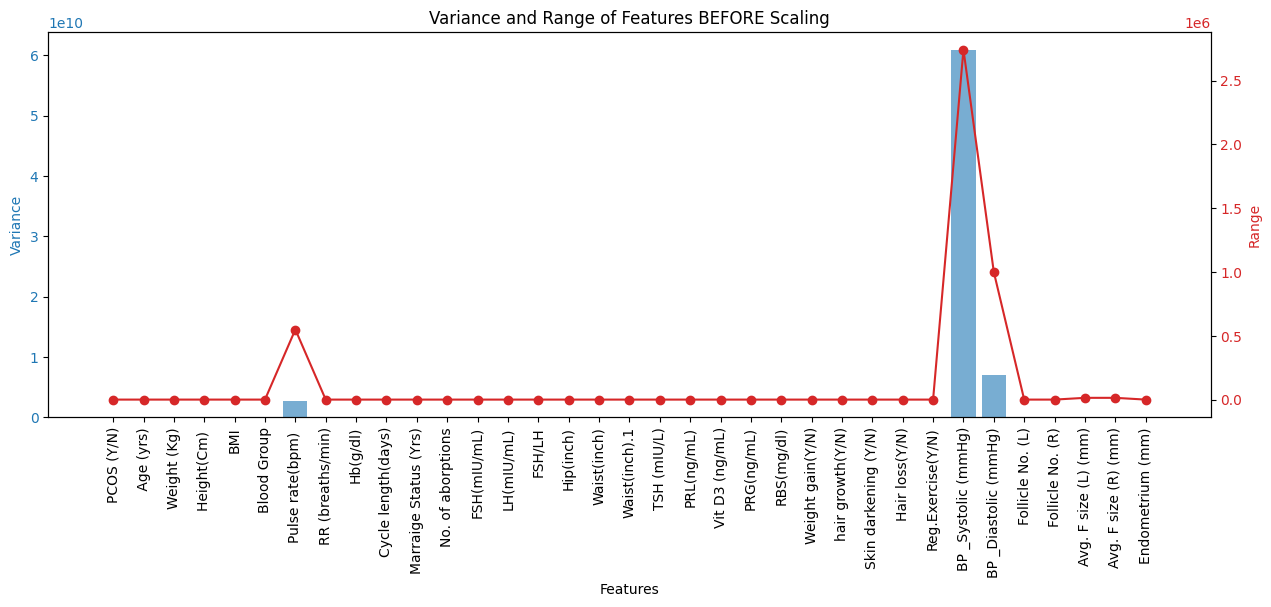

In [ ]:
import numpy as np

# Variance and Range before scaling
variances = df[numeric_cols].var()
ranges = df[numeric_cols].max() - df[numeric_cols].min()

fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Features')
ax1.set_ylabel('Variance', color=color)
ax1.bar(numeric_cols, variances, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Range', color=color)
ax2.plot(numeric_cols, ranges, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Variance and Range of Features BEFORE Scaling")
plt.show()

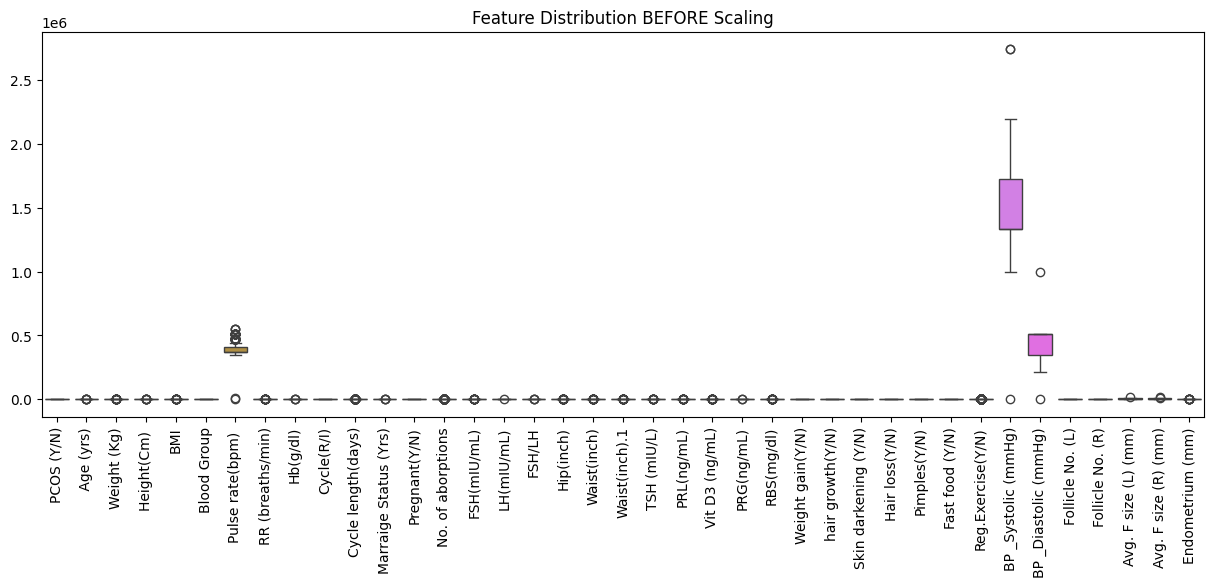

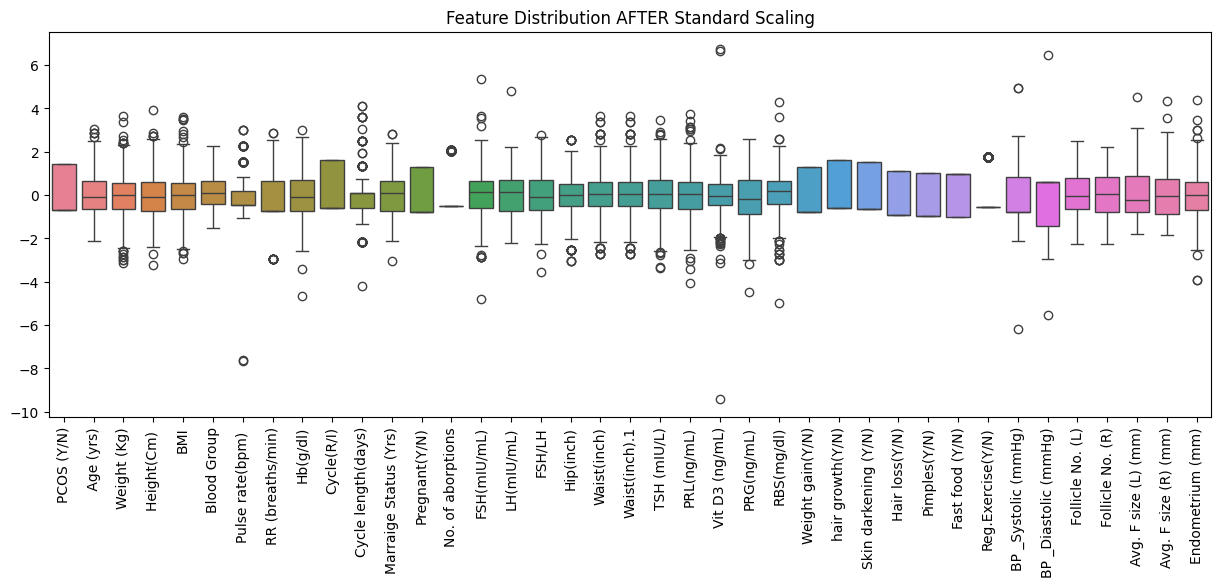

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numeric_cols = df.select_dtypes(include=np.number).columns

# Before scaling
plt.figure(figsize=(15,5))
sns.boxplot(data=df[numeric_cols])
plt.title("Feature Distribution BEFORE Scaling")
plt.xticks(rotation=90)
plt.show()

print()
# Apply StandardScaler (example)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# After scaling
plt.figure(figsize=(15,5))
sns.boxplot(data=df_scaled[numeric_cols])
plt.title("Feature Distribution AFTER Standard Scaling")
plt.xticks(rotation=90)
plt.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

numeric_cols = df.select_dtypes(include=np.number).columns

# Compute variance and range
variances = df[numeric_cols].var()
ranges = df[numeric_cols].max() - df[numeric_cols].min()

# Create figure
fig = go.Figure()

# Add Variance as bar chart
fig.add_trace(go.Bar(
    x=numeric_cols,
    y=variances,
    name='Variance',
    marker_color='blue',
    opacity=0.6,
    yaxis='y1'
))

# Add Range as line chart
fig.add_trace(go.Scatter(
    x=numeric_cols,
    y=ranges,
    name='Range',
    marker=dict(color='red', size=8),
    line=dict(color='red', width=2),
    yaxis='y2'
))

# Update layout for two y-axes
fig.update_layout(
    title='Variance and Range of Features BEFORE Scaling',
    xaxis=dict(title='Features', tickangle=45),
    yaxis=dict(
        title='Variance',
        tickfont=dict(color='blue')
    ),
    yaxis2=dict(
        title='Range',
        tickfont=dict(color='red'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.8, y=1.1),
    width=1200,
    height=600
)

fig.show()

In [ ]:
df["PCOS (Y/N)"].unique()

array([-0.69732613,  1.43404922])

In [ ]:
import numpy as np

df['PCOS (Y/N)'] = np.where(np.isclose(df['PCOS (Y/N)'], -0.69732613), 0, 1)
print(df['PCOS (Y/N)'].value_counts())

PCOS (Y/N)
0    364
1    177
Name: count, dtype: int64


In [ ]:
df["PCOS (Y/N)"].unique()

array([0, 1])

### Correlation HeatMap

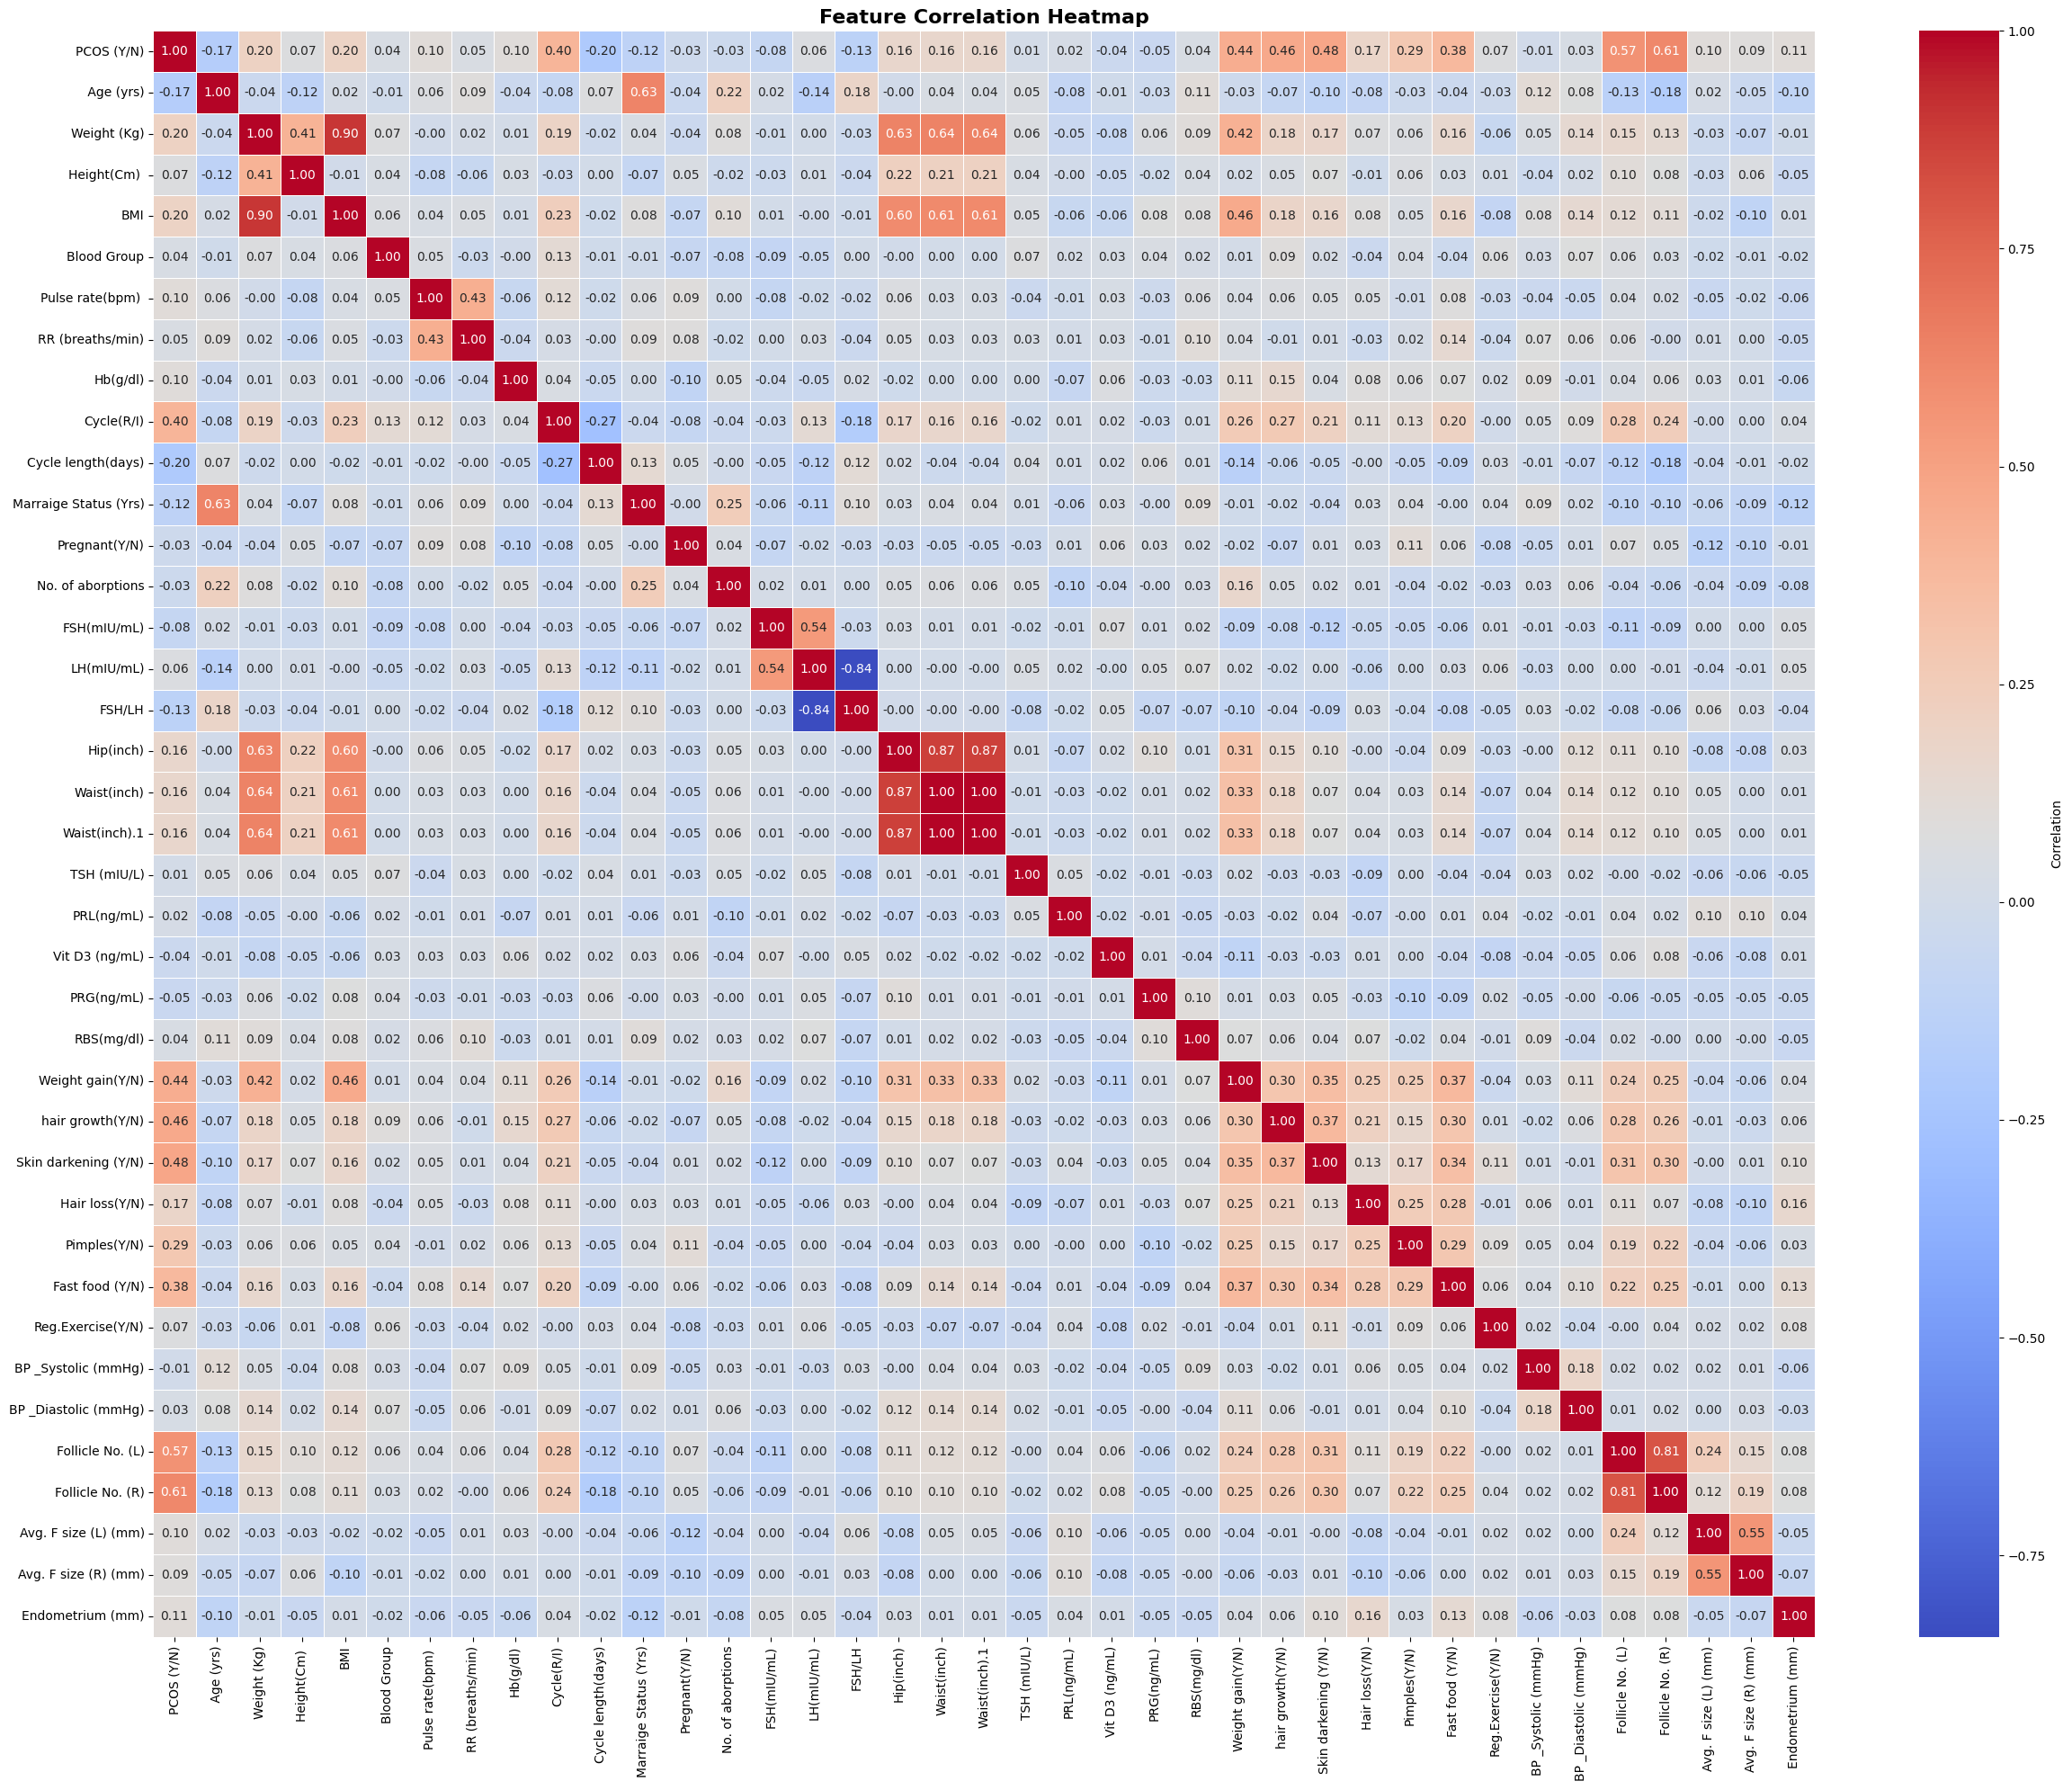

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(25, 20))  # adjust figure size so all labels fit
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Correlation"}
)

plt.title("Feature Correlation Heatmap", fontsize=16, weight="bold")
plt.xticks(rotation=90)  # rotate x labels so they don’t overlap
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Target Column Distribution

Target Column Distribution : (541, 38) {0: 364, 1: 177}


/tmp/ipython-input-3857905782.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




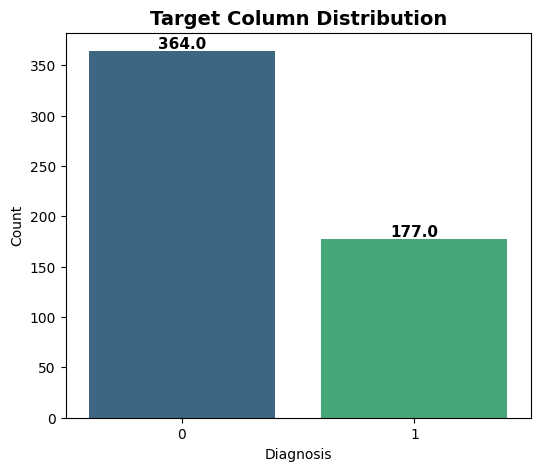

In [ ]:
X = df.drop(columns=['PCOS (Y/N)'])
y = df['PCOS (Y/N)']

print("Target Column Distribution :", X.shape, y.value_counts().to_dict())

plt.figure(figsize=(6,5))
ax = sns.countplot(x=y, palette="viridis")

# Add annotations on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black', weight='bold')

plt.title("Target Column Distribution", fontsize=14, weight="bold")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()


### Training model Using ANN

In [ ]:
X=df.drop(columns=['PCOS (Y/N)'])
y=df['PCOS (Y/N)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
import keras
from keras.optimizers import Adam

model = keras.Sequential([


    keras.layers.Dense(256, input_shape=(X_train.shape[1],), activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(1, activation="sigmoid")
])

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.4484 - loss: 0.7368 - val_accuracy: 0.5046 - val_loss: 0.6921
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4873 - loss: 0.7028 - val_accuracy: 0.7523 - val_loss: 0.6447
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6671 - loss: 0.6425 - val_accuracy: 0.7982 - val_loss: 0.6043
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6993 - loss: 0.6208 - val_accuracy: 0.7982 - val_loss: 0.5697
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7609 - loss: 0.5685 - val_accuracy: 0.7798 - val_loss: 0.5390
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7771 - loss: 0.5528 - val_accuracy: 0.8073 - val_loss: 0.5123
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7540 - loss: 0.5304 - val_accuracy: 0.8073 - val_loss: 0.4861
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7674 - loss: 0.5056 - val_accuracy: 0.8073

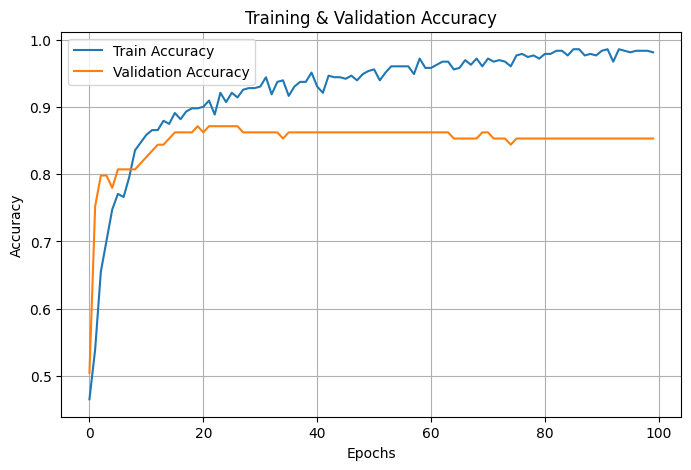

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


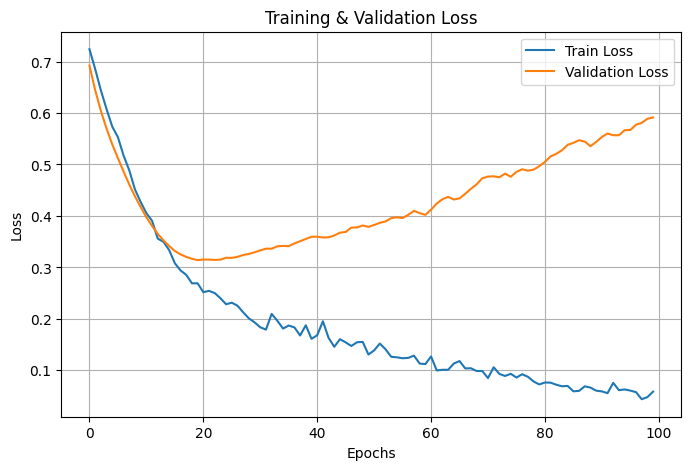

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
y_pred_probs = model.predict(X_test)  # probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # apply threshold

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


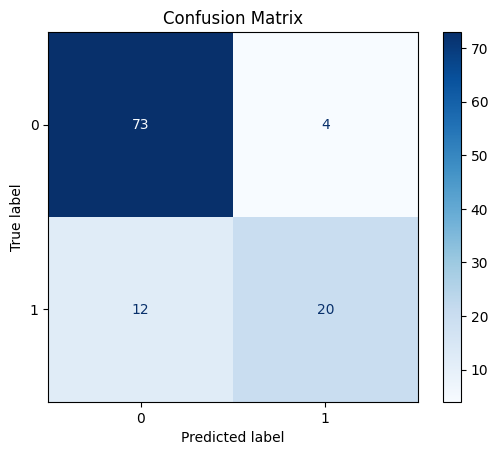

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


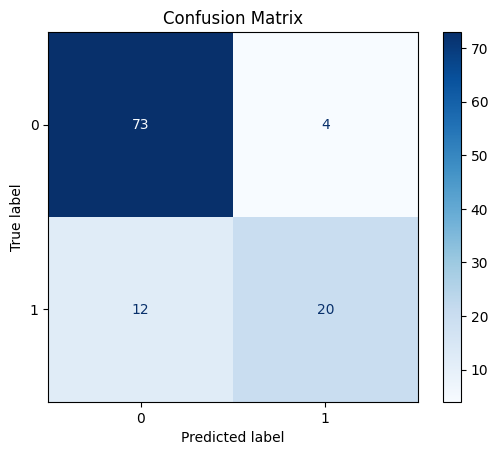

Model Performance Metrics
Accuracy  : 0.8532
Precision : 0.8333
Recall    : 0.6250
F1 Score  : 0.7143

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        77
           1       0.83      0.62      0.71        32

    accuracy                           0.85       109
   macro avg       0.85      0.79      0.81       109
weighted avg       0.85      0.85      0.85       109



In [ ]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    ConfusionMatrixDisplay, accuracy_score,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt

# Predictions
y_pred_probs = model.predict(X_test)  # probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # threshold at 0.5

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Model Performance Metrics")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# Optional: detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


### Applying SMOTE TOMEK balancing Technique

Before SMOTE-Tomek: (541, 38) {0: 364, 1: 177}
After SMOTE-Tomek: (620, 38) {0: 310, 1: 310}
----------------------------------------------


/tmp/ipython-input-3572921804.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




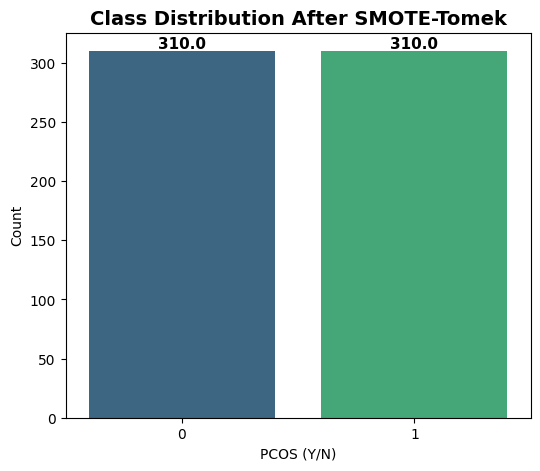

Train set shape: (496, 38) Val set shape: (124, 38)


In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Splitting features and target
X = df.drop(columns=['PCOS (Y/N)'])
y = df['PCOS (Y/N)']

# Apply SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Create new dataframe
df_stomek = pd.DataFrame(X_resampled, columns=X.columns)
df_stomek['PCOS (Y/N)'] = y_resampled

print("Before SMOTE-Tomek:", X.shape, y.value_counts().to_dict())
print("After SMOTE-Tomek:", X_resampled.shape, pd.Series(y_resampled).value_counts().to_dict())
print("----------------------------------------------")

# Plot distribution with annotations
fig, ax = plt.subplots(figsize=(6,5))
sns.countplot(x=y_resampled, palette="viridis", ax=ax)

# Add annotations on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black', weight='bold')

ax.set_xlabel("PCOS (Y/N)")
ax.set_ylabel("Count")
plt.title("Class Distribution After SMOTE-Tomek", fontsize=14, weight="bold")
plt.show()

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

print("Train set shape:", X_train.shape, "Val set shape:", X_val.shape)


In [ ]:
df_stomek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0    Age (yrs)             620 non-null    int64  
 1   Weight (Kg)            620 non-null    float64
 2   Height(Cm)             620 non-null    float64
 3   BMI                    620 non-null    float64
 4   Blood Group            620 non-null    int64  
 5   Pulse rate(bpm)        620 non-null    int64  
 6   RR (breaths/min)       620 non-null    float64
 7   Hb(g/dl)               620 non-null    float64
 8   Cycle(R/I)             620 non-null    int64  
 9   Cycle length(days)     620 non-null    float64
 10  Marraige Status (Yrs)  620 non-null    float64
 11  Pregnant(Y/N)          620 non-null    int64  
 12  No. of aborptions      620 non-null    float64
 13  FSH(mIU/mL)            620 non-null    float64
 14  LH(mIU/mL)             620 non-null    float64
 15  FSH/LH

### Training The Model After Balancing

In [ ]:
X=df_stomek.drop(columns=['PCOS (Y/N)'])
y=df_stomek['PCOS (Y/N)']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
import keras
from keras.optimizers import Adam

model = keras.Sequential([


    keras.layers.Dense(256, input_shape=(X_train.shape[1],), activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(32, activation="relu"),

    keras.layers.Dense(1, activation="sigmoid")
])

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4902 - loss: 0.7063 - val_accuracy: 0.5806 - val_loss: 0.6666
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5986 - loss: 0.6644 - val_accuracy: 0.7097 - val_loss: 0.6330
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6865 - loss: 0.6357 - val_accuracy: 0.8145 - val_loss: 0.5947
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7863 - loss: 0.5935 - val_accuracy: 0.8387 - val_loss: 0.5489
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8181 - loss: 0.5491 - val_accuracy: 0.8629 - val_loss: 0.4981
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8149 - loss: 0.5118 - val_accuracy: 0.8871 - val_loss: 0.4469
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8644 - loss: 0.4505 - val_accuracy: 0.8871 - val_loss: 0.3938
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8684 - loss: 0.4043 - val_accuracy: 0.9032 - 

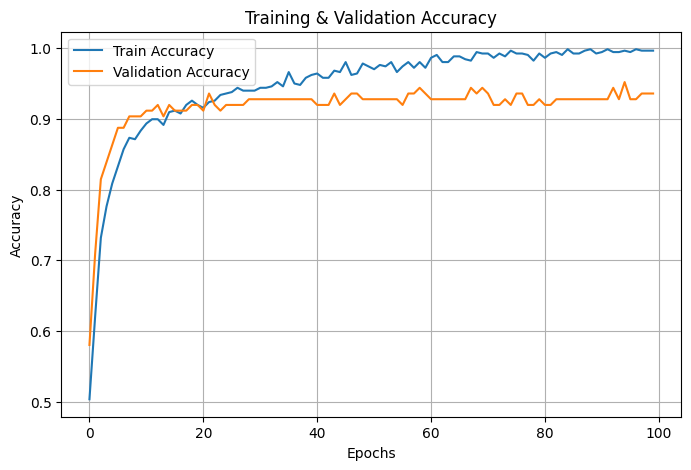

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


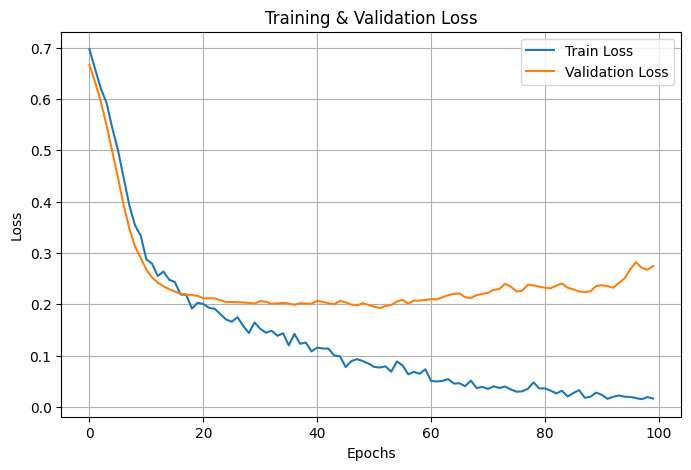

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
y_pred_probs = model.predict(X_test)  # probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # apply threshold

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


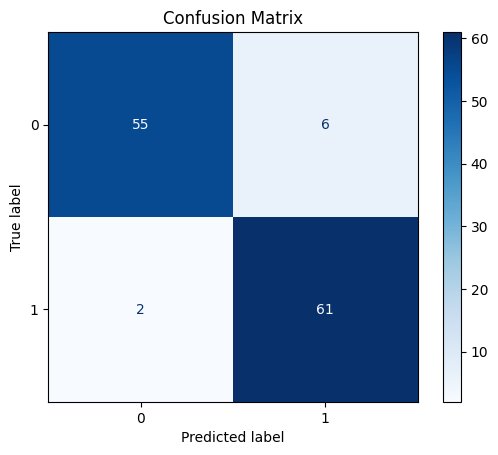

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


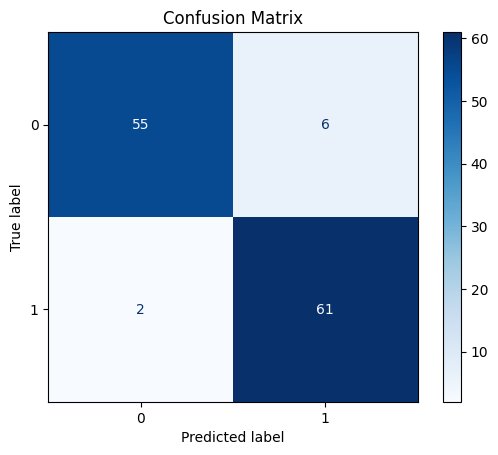

Model Performance Metrics
Accuracy  : 0.9355
Precision : 0.9104
Recall    : 0.9683
F1 Score  : 0.9385

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        61
           1       0.91      0.97      0.94        63

    accuracy                           0.94       124
   macro avg       0.94      0.93      0.94       124
weighted avg       0.94      0.94      0.94       124



In [ ]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    ConfusionMatrixDisplay, accuracy_score,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt

# Predictions
y_pred_probs = model.predict(X_test)  # probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # threshold at 0.5

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Model Performance Metrics")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# Optional: detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


#### Applying Feature Selection Technique

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6001 - loss: 0.6756
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7282 - loss: 0.5117 
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8245 - loss: 0.4107 
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8802 - loss: 0.3530 
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9000 - loss: 0.3086 
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8965 - loss: 0.2891 
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9239 - loss: 0.2405 
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9208 - loss: 0.2185 
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9320 - loss: 0.2060 
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9318 - loss: 0.1846 
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9510 - loss: 0.1738 
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning:

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_151
Received: inputs=['Tensor(shape=(100, 38))']

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning:

The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_151
Received: inputs=['Tensor(shape=(200, 38))']



✅ SHAP values shape: (200, 38)
✅ to_explain shape: (200, 38)


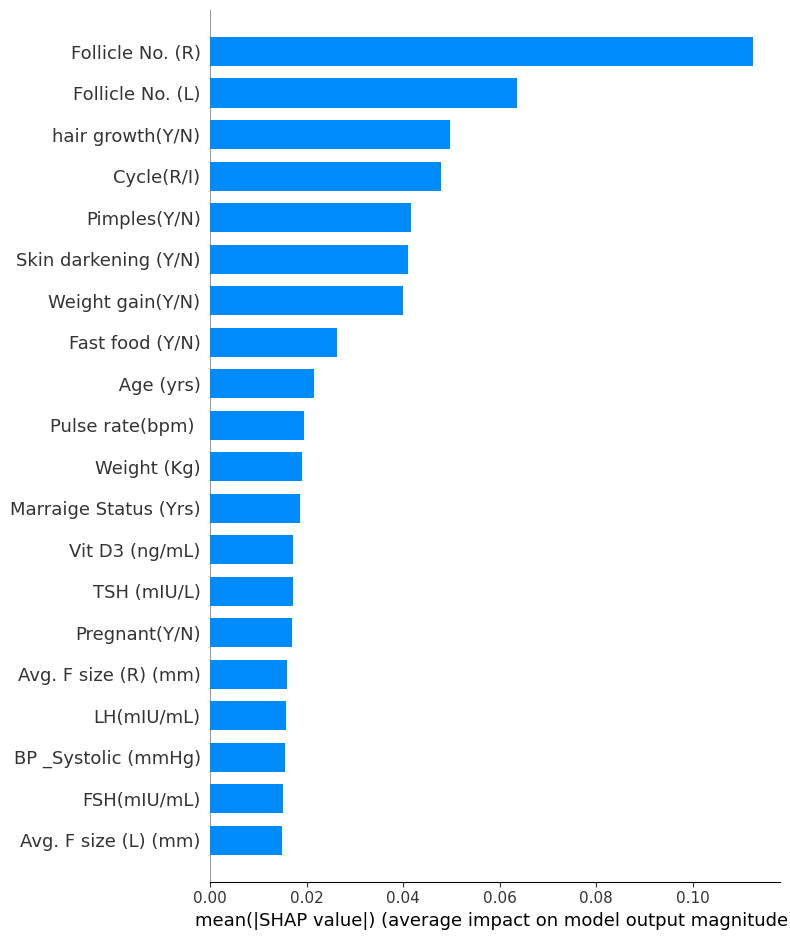

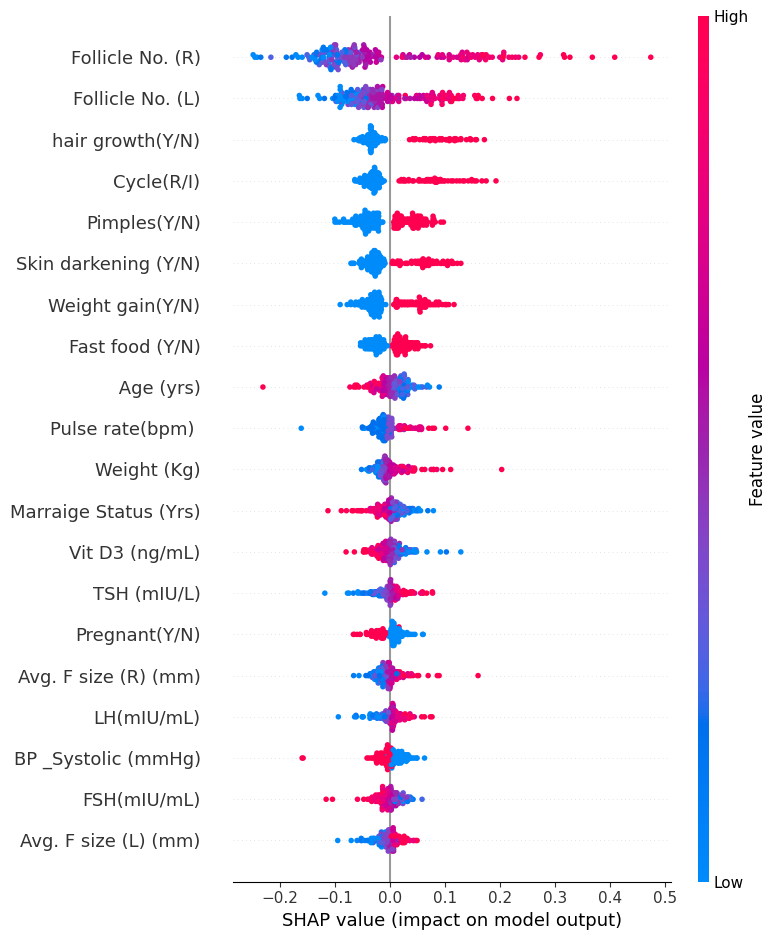


📊 Global Feature Importance:
                  Feature  Importance
34       Follicle No. (R)    0.112504
33       Follicle No. (L)    0.063628
25       hair growth(Y/N)    0.049714
8              Cycle(R/I)    0.047752
28           Pimples(Y/N)    0.041574
26   Skin darkening (Y/N)    0.041026
24       Weight gain(Y/N)    0.039901
29        Fast food (Y/N)    0.026183
0               Age (yrs)    0.021544
5        Pulse rate(bpm)     0.019395
1             Weight (Kg)    0.019047
10  Marraige Status (Yrs)    0.018561
21         Vit D3 (ng/mL)    0.017197
19            TSH (mIU/L)    0.017162
11          Pregnant(Y/N)    0.016950
36   Avg. F size (R) (mm)    0.015997
14             LH(mIU/mL)    0.015624
31    BP _Systolic (mmHg)    0.015404
13            FSH(mIU/mL)    0.015022
35   Avg. F size (L) (mm)    0.014913
9      Cycle length(days)    0.014804
16              Hip(inch)    0.012063
17            Waist(inch)    0.011103
30      Reg.Exercise(Y/N)    0.011007
18          Waist(in

In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

# ----------------------------
# 1. Prepare Data

X = df.drop("PCOS (Y/N)", axis=1)
y = df["PCOS (Y/N)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features for NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# 2. Build Neural Network
# ----------------------------
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1)

# ----------------------------
# 3. SHAP Feature Importance
# ----------------------------
# background data for SHAP (subset of training set)
background = X_train_scaled[:100]

# samples to explain
to_explain = X_train_scaled[:200]

# DeepExplainer for neural networks
explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(to_explain)

# Handle binary classification outputs
if isinstance(shap_values, list):
    shap_values = shap_values[0]

# Fix extra dimensions if needed
if shap_values.ndim == 3:
    shap_values = shap_values[:, :, 0]

print("✅ SHAP values shape:", shap_values.shape)
print("✅ to_explain shape:", to_explain.shape)

# ----------------------------
# 4. Plots
# ----------------------------

shap.summary_plot(shap_values, to_explain, feature_names=X.columns, plot_type="bar")

# Detailed beeswarm plot
shap.summary_plot(shap_values, to_explain, feature_names=X.columns)

# ----------------------------
# 5. Global Feature Ranking
# ----------------------------
# Mean absolute SHAP value per feature
feature_importance = np.abs(shap_values).mean(axis=0)

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

print("\n📊 Global Feature Importance:")
print(importance_df)

# If you want the top-k features, e.g. top 10
top_features = importance_df.head(10)["Feature"].tolist()
print("\n🏆 Top 10 Features:", top_features)


In [ ]:
top20_features = [
    "Follicle No. (R)",
    "Follicle No. (L)",
    "hair growth(Y/N)",
    "Pimples(Y/N)",
    "Cycle(R/I)",
    "Skin darkening (Y/N)",
    "Weight gain(Y/N)",
    "Pregnant(Y/N)",
    "Marraige Status (Yrs)",
    "Vit D3 (ng/mL)",
    "Fast food (Y/N)",
    "Avg. F size (R) (mm)",
    "Pulse rate(bpm) ",
    "Cycle length(days)",
    "FSH/LH",
    "TSH (mIU/L)",
    " Age (yrs)",
    "Hair loss(Y/N)",
    "Avg. F size (L) (mm)",
    "BMI",
    "PCOS (Y/N)"   # target column
]

df_top20 = df_stomek[top20_features]


In [ ]:
df_top20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Follicle No. (R)       620 non-null    float64
 1   Follicle No. (L)       620 non-null    float64
 2   hair growth(Y/N)       620 non-null    float64
 3   Pimples(Y/N)           620 non-null    int64  
 4   Cycle(R/I)             620 non-null    int64  
 5   Skin darkening (Y/N)   620 non-null    float64
 6   Weight gain(Y/N)       620 non-null    float64
 7   Pregnant(Y/N)          620 non-null    int64  
 8   Marraige Status (Yrs)  620 non-null    float64
 9   Vit D3 (ng/mL)         620 non-null    float64
 10  Fast food (Y/N)        620 non-null    float64
 11  Avg. F size (R) (mm)   620 non-null    float64
 12  Pulse rate(bpm)        620 non-null    int64  
 13  Cycle length(days)     620 non-null    float64
 14  FSH/LH                 620 non-null    float64
 15  TSH (m

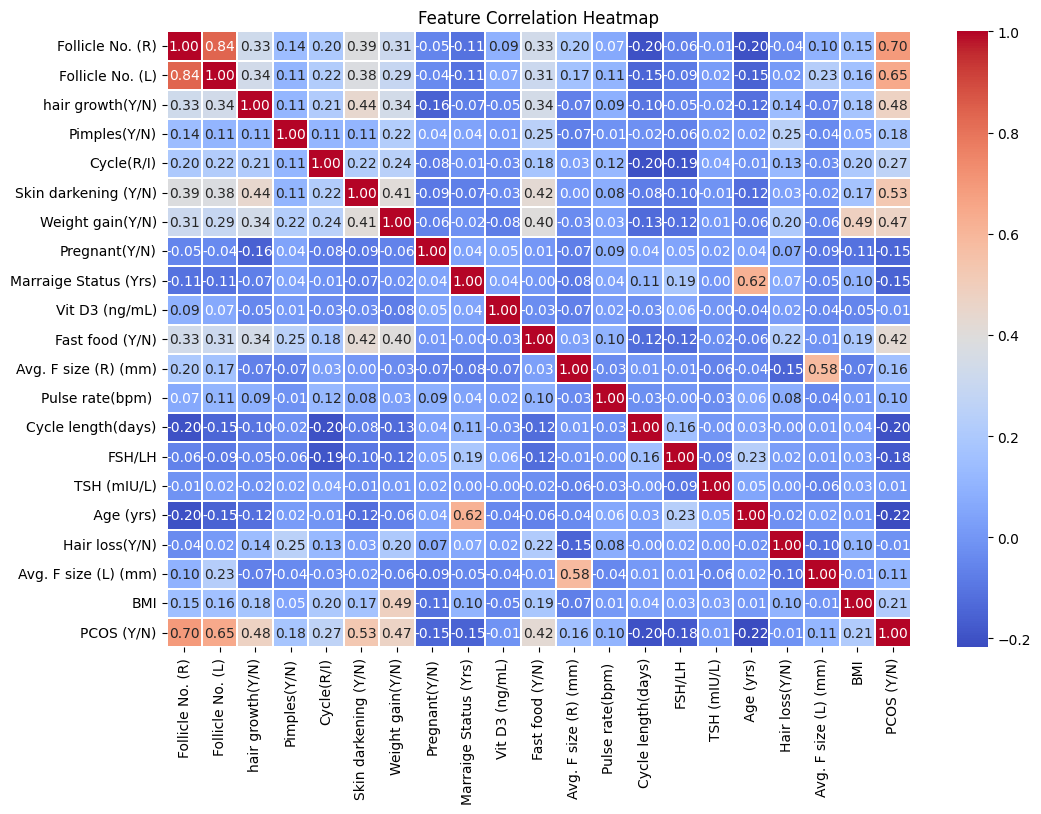

In [ ]:
corr_matrix =df_top20.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title("Feature Correlation Heatmap")
plt.show()

### Training Model After Feature Selection

In [ ]:
X=df_top20.drop(columns=['PCOS (Y/N)'])
y=df_top20['PCOS (Y/N)']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
import keras
from keras.optimizers import Adam

model = keras.Sequential([


    keras.layers.Dense(256, input_shape=(X_train.shape[1],), activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(32, activation="relu"),

    keras.layers.Dense(1, activation="sigmoid")
])

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5811 - loss: 0.6736 - val_accuracy: 0.7742 - val_loss: 0.6226
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6425 - loss: 0.6358 - val_accuracy: 0.8468 - val_loss: 0.5717
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8379 - loss: 0.5764 - val_accuracy: 0.8629 - val_loss: 0.5157
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8623 - loss: 0.5285 - val_accuracy: 0.8548 - val_loss: 0.4597
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8737 - loss: 0.4617 - val_accuracy: 0.8790 - val_loss: 0.4029
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8913 - loss: 0.4080 - val_accuracy: 0.8871 - val_loss: 0.3555
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8673 - loss: 0.3786 - val_accuracy: 0.9032 - val_loss: 0.3154
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8927 - loss: 0.3313 - val_accuracy: 0.9

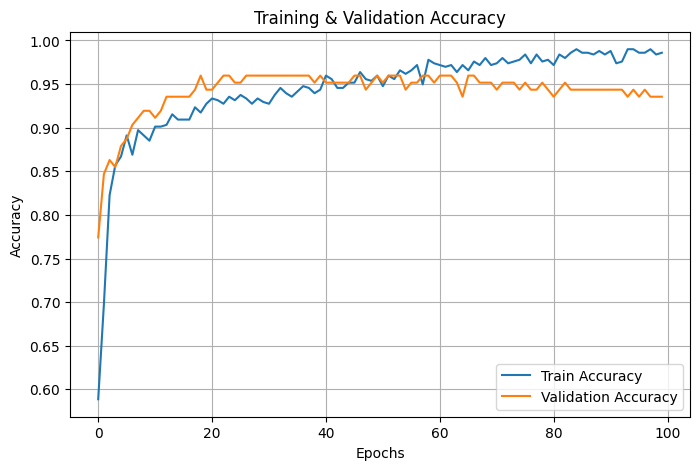

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


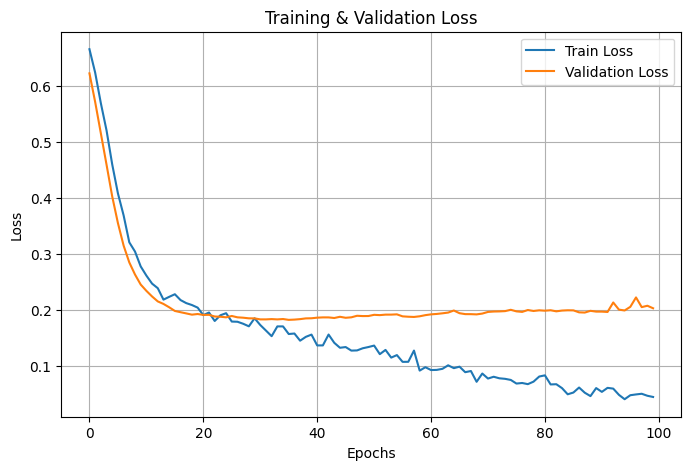

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred_probs = model.predict(X_test)  # probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # apply threshold

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


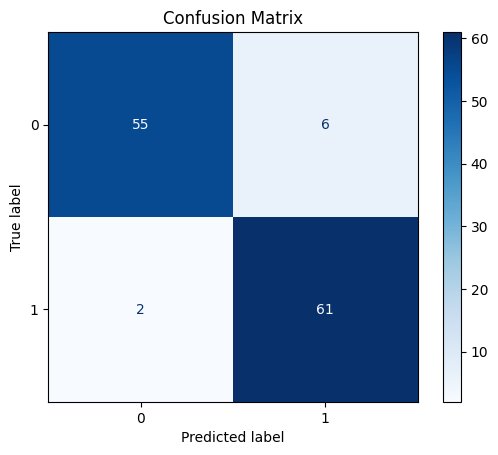

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


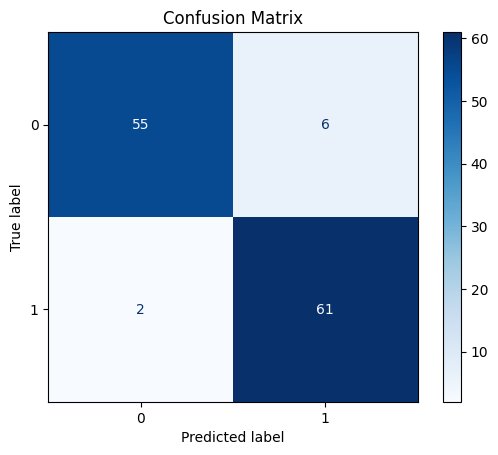

Model Performance Metrics
Accuracy  : 0.9355
Precision : 0.9104
Recall    : 0.9683
F1 Score  : 0.9385

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        61
           1       0.91      0.97      0.94        63

    accuracy                           0.94       124
   macro avg       0.94      0.93      0.94       124
weighted avg       0.94      0.94      0.94       124



In [ ]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    ConfusionMatrixDisplay, accuracy_score,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt

# Predictions
y_pred_probs = model.predict(X_test)  # probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # threshold at 0.5

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Model Performance Metrics")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# Optional: detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


In [ ]:
import keras
from keras.optimizers import Adam

model = keras.Sequential([

    keras.layers.Dense(256, input_shape=(X_train.shape[1],), activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),


    keras.layers.Dense(1, activation="sigmoid")
])

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5296 - loss: 0.8485 - val_accuracy: 0.7177 - val_loss: 0.6506
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6783 - loss: 0.6568 - val_accuracy: 0.7984 - val_loss: 0.6158
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7204 - loss: 0.5710 - val_accuracy: 0.8548 - val_loss: 0.5817
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7344 - loss: 0.5154 - val_accuracy: 0.8306 - val_loss: 0.5471
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7908 - loss: 0.4452 - val_accuracy: 0.8710 - val_loss: 0.5148
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8201 - loss: 0.3966 - val_accuracy: 0.8790 - val_loss: 0.4808
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8630 - loss: 0.3374 - val_accuracy: 0.8871 - val_loss: 0.4492
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8462 - loss: 0.3599 - val_accuracy: 0.8871 -

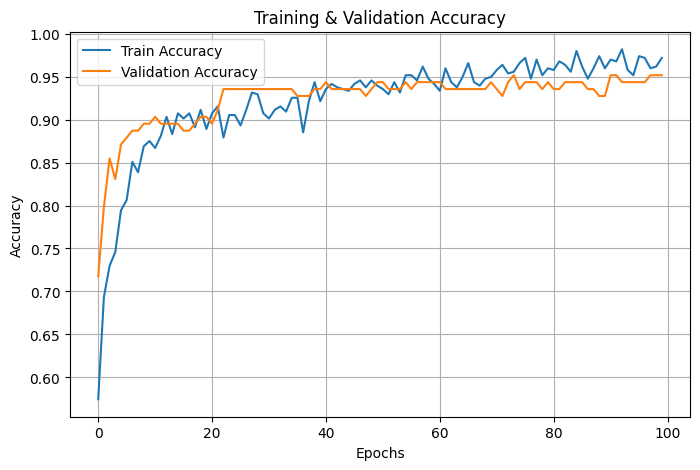

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


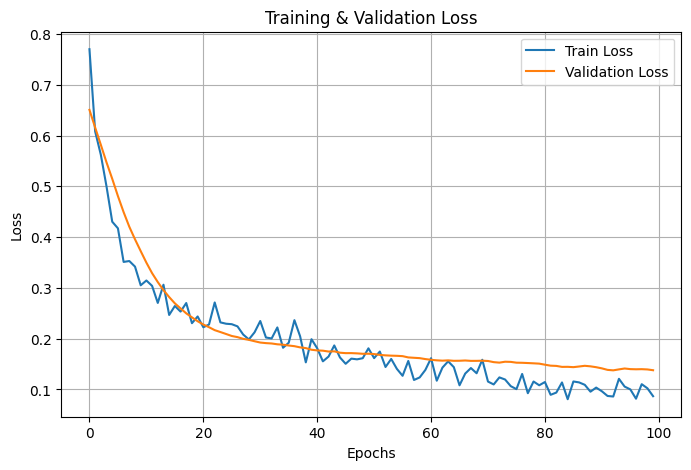

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred_probs = model.predict(X_test)  # probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # apply threshold

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


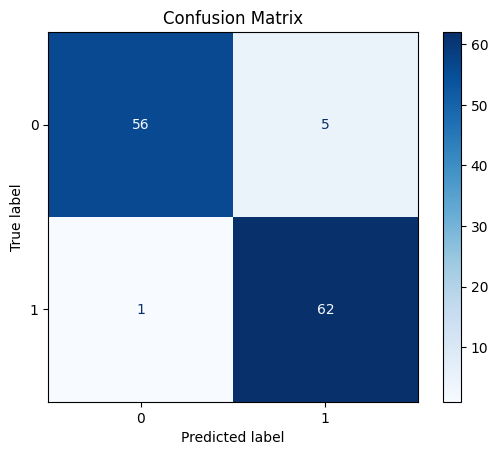

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


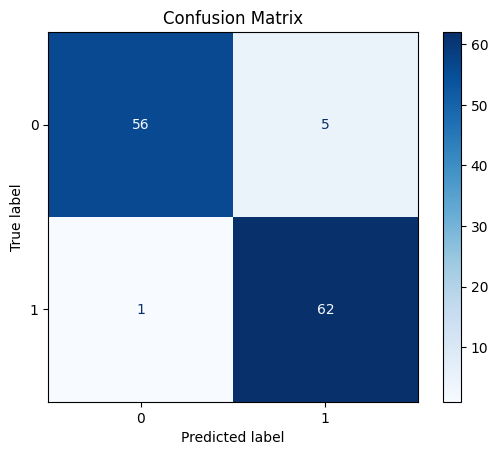

Model Performance Metrics
Accuracy  : 0.9516
Precision : 0.9254
Recall    : 0.9841
F1 Score  : 0.9538

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        61
           1       0.93      0.98      0.95        63

    accuracy                           0.95       124
   macro avg       0.95      0.95      0.95       124
weighted avg       0.95      0.95      0.95       124



In [ ]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    ConfusionMatrixDisplay, accuracy_score,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt

# Predictions
y_pred_probs = model.predict(X_test)  # probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # threshold at 0.5

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Model Performance Metrics")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# Optional: detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


In [ ]:
import keras
from keras.optimizers import Adam

model = keras.Sequential([

    keras.layers.Dense(256, input_shape=(X_train.shape[1],), activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),

    keras.layers.Dense(128, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(64, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),


    keras.layers.Dense(1, activation="sigmoid")
])

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5554 - loss: 0.7780 - val_accuracy: 0.7419 - val_loss: 0.6500
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6276 - loss: 0.6367 - val_accuracy: 0.7742 - val_loss: 0.6242
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7176 - loss: 0.5617 - val_accuracy: 0.8387 - val_loss: 0.5981
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7921 - loss: 0.4564 - val_accuracy: 0.8468 - val_loss: 0.5740
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7764 - loss: 0.4438 - val_accuracy: 0.8629 - val_loss: 0.5480
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8569 - loss: 0.3668 - val_accuracy: 0.8710 - val_loss: 0.5216
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8588 - loss: 0.3553 - val_accuracy: 0.8710 - val_loss: 0.4956
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8623 - loss: 0.3606 - val_accuracy: 0.8710 - 

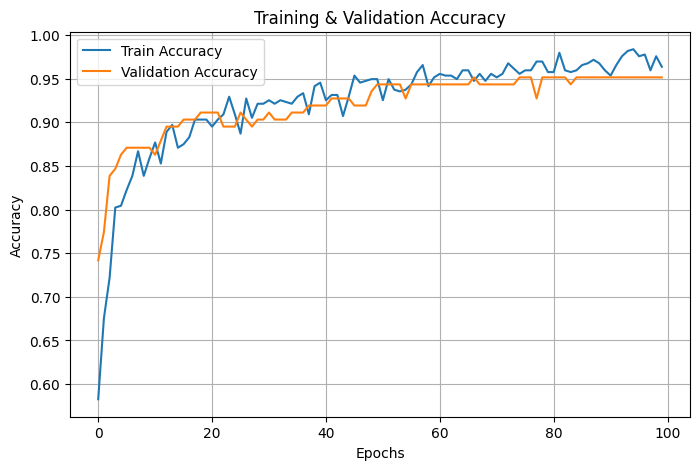

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


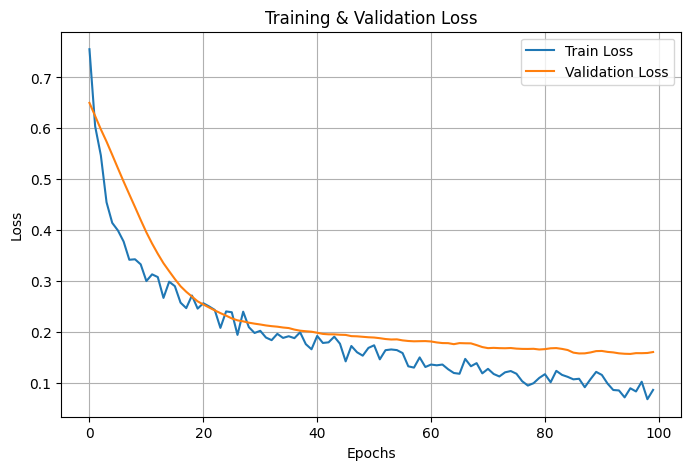

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


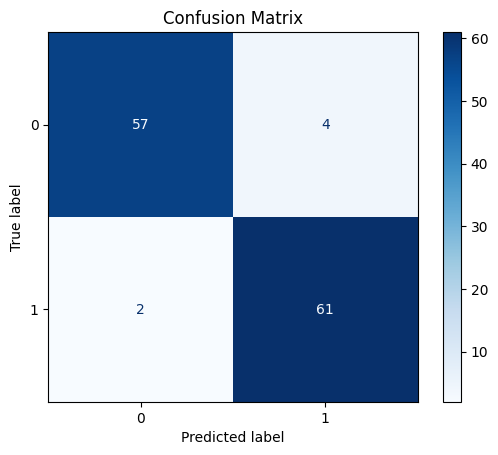

Model Performance Metrics
Accuracy  : 0.9516
Precision : 0.9385
Recall    : 0.9683
F1 Score  : 0.9531

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        61
           1       0.94      0.97      0.95        63

    accuracy                           0.95       124
   macro avg       0.95      0.95      0.95       124
weighted avg       0.95      0.95      0.95       124



In [ ]:
from sklearn.metrics import (
    confusion_matrix, classification_report,
    ConfusionMatrixDisplay, accuracy_score,
    precision_score, recall_score, f1_score
)
import matplotlib.pyplot as plt

# Predictions
y_pred_probs = model.predict(X_test)  # probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # threshold at 0.5

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Model Performance Metrics")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# Optional: detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))
